### Extracting Data From Kaggle

In [1]:
from google.colab import files
files.upload()   # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aliehab2005","key":"76c82c58ff371648d9ace927bc896623"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 99% 608M/612M [00:01<00:00, 278MB/s]
100% 612M/612M [00:01<00:00, 398MB/s]


In [4]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

## Requirements Used:-

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout


## Loading Data

In [6]:
data_dir = '/content/Train'

images = []
labels = []

for class_id in range(43):
  class_path = os.path.join(data_dir , str(class_id))
  for img_name in os.listdir(class_path):
    img_path = os.path.join(class_path , img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img , (32,32))
    images.append(img)
    labels.append(class_id)

images = np.array(images)
labels = np.array(labels)


## Images Shape & Labels Shape

In [7]:
print("Dataset Shape: ",images.shape , labels.shape)

Dataset Shape:  (39209, 32, 32, 3) (39209,)


## Scaling Images & Encoding Labels

In [8]:
images = images.astype('float32') / 255.0 # Normalization
labels = to_categorical(labels , 43) # one hot encoding

In [9]:
X_train , X_test , y_train, y_test = train_test_split(images , labels , test_size=0.2 , random_state = 42)

## Model Structure

In [10]:
model = Sequential([
    Conv2D(32 , (3,3) , activation='relu' , input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64 , (3,3) , activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128 , activation='relu'),
    Dropout(0.5),
    Dense(43 , activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

## Model Compile

In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
history = model.fit(X_train , y_train , epochs = 15 , batch_size=64 , validation_data = (X_test , y_test))

Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.2896 - loss: 2.6770 - val_accuracy: 0.8679 - val_loss: 0.5398
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7949 - loss: 0.6720 - val_accuracy: 0.9638 - val_loss: 0.2094
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8874 - loss: 0.3702 - val_accuracy: 0.9711 - val_loss: 0.1340
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9221 - loss: 0.2528 - val_accuracy: 0.9851 - val_loss: 0.0769
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9371 - loss: 0.2026 - val_accuracy: 0.9810 - val_loss: 0.0765
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9531 - loss: 0.1513 - val_accuracy: 0.9870 - val_loss: 0.0602
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9582 - loss: 0.1346 - val_accuracy: 0.9883 - val_loss: 0.0490
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9640 - loss: 0.1112 - val_accuracy: 

## Evaluating Model Performance

In [16]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred , axis=1)
y_true = np.argmax(y_test , axis=1)

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [17]:
test_loss , test_acc = model.evaluate(X_test , y_test , verbose=0)
print('Test Accuracy: ', test_acc)
print('Test Loss: ', test_loss)

Test Accuracy:  0.9931139945983887
Test Loss:  0.031726691871881485


## Confusion Matrix & Classification Report

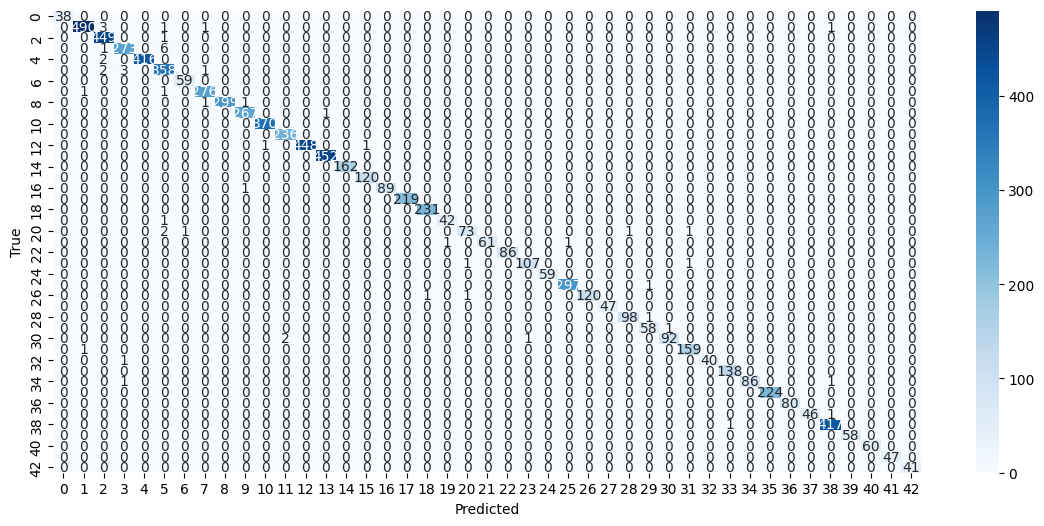

In [18]:
cm = confusion_matrix(y_true , y_pred_classes)
plt.figure(figsize=(14,6))
sns.heatmap(cm , annot=True , fmt='d' , cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
print("Classification Report: ",classification_report(y_true , y_pred_classes))

Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.99      0.99       496
           2       0.98      1.00      0.99       450
           3       0.98      0.97      0.98       280
           4       1.00      1.00      1.00       418
           5       0.97      0.98      0.98       364
           6       0.98      1.00      0.99        59
           7       0.99      0.99      0.99       278
           8       1.00      0.99      1.00       301
           9       0.99      1.00      0.99       268
          10       1.00      1.00      1.00       370
          11       0.99      1.00      1.00       236
          12       1.00      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       1.00      1.00      1.00       162
          15       0.99      1.00      1.00       120
          16       1.00      0.99      0.99        90
   